# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

# Functions

# Main

In [2]:
from base.systems import HardDiskSystem
box_size = 10
n_particles = 3
particle_radius = 1
system_a = HardDiskSystem(
    box_size = box_size, 
    n_particles=n_particles,
    particle_radius=particle_radius, 
    periodic_boundary = False
)

system_a.positions = np.array([[2.,2.], [6.,2.], [7.,5.]])
system_a.velocities = np.array([[1.,0.], [-1.,0.], [2.,0.]])

system_b = HardDiskSystem(
    box_size = box_size, 
    n_particles=n_particles,
    particle_radius=particle_radius, 
    periodic_boundary = False
)

system_b.positions = np.array([[2.,2.], [6.,2.], [8.,5.]])
system_b.velocities = np.array([[1.,0.], [-1.,0.], [2.2,2.]])


2025-07-13 15:18:33,831 - INFO - system created with 3 particles
2025-07-13 15:18:33,832 - INFO - system created with 3 particles


In [3]:
def update_velocitie(sim, i, j):
    xi = sim.system.positions[i]
    xj = sim.system.positions[j]
    dx = xi - xj

    vi = sim.system.velocities[i]
    vj = sim.system.velocities[j]
    dv = vi - vj

    e = dx / np.sqrt(np.dot(dx,dx))
    magnitude_change = np.dot(e, dv)
    vi_linha = vi - magnitude_change * e
    vj_linha = vj + magnitude_change * e

    sim.system.velocities[i] = vi_linha
    sim.system.velocities[j] = vj_linha

def next_wall_colision(sim):
    pos_mask = sim.system.velocities > 0
    neg_mask = sim.system.velocities < 0

    #set the direction mask
    t_plus = np.full_like(sim.system.positions, np.inf)
    t_neg = np.full_like(sim.system.positions, np.inf)

    #calculate the time of colision in each direction
    pos_dis = sim.system.box_size - sim.system.particle_radius - sim.system.positions[pos_mask]
    t_plus[pos_mask] = pos_dis / sim.system.velocities[pos_mask]
    neg_dis = sim.system.positions[neg_mask] - sim.system.particle_radius
    t_neg[neg_mask] = neg_dis / -sim.system.velocities[neg_mask]

    #set the minimun colision time in each dimension for the particles
    times = np.minimum(t_neg, t_plus)
    #wall that was hitted (0 for colision in y and 1 for colision in x)
    wall_hit = np.argmin(times,axis=1)
    hit_times = times[np.arange(sim.system.n_particles), wall_hit]
    colided_particle = np.argmin(hit_times)
    wall_colided = wall_hit[colided_particle]
    next_colision_time = min(hit_times)
    return wall_colided, colided_particle, next_colision_time


In [4]:
def step(sim, ax = None):
    #calculate next pair colision
    particles, pair_colision_at = sim._next_pair_colision()
    to_particles_colide = pair_colision_at - sim.time

    #calculate next wall colision
    wall_colide, particle_colided, to_colide_wall = next_wall_colision(sim)

    #what comes first?
    next_event_is_wall = to_colide_wall < to_particles_colide
    if next_event_is_wall:
        # print(f'particle {particle_colided} colide with wall {'y' if wall_colide == 0 else 'x'}')
        # print("particle involved: ", particle_colided)
        # print("wall involved: ", 'y' if wall_colide == 0 else 'x')
        # print("colision occur in: ", to_colide_wall)

        sim._update_position(to_colide_wall)
        sim.system.velocities[particle_colided][wall_colide] *= -1
        sim.time += to_colide_wall
    else:
        # print(f"particle {particles[0]} colide with {particles[1]}")
        # print("particles involved: ", particles)
        # print("colision occur in: ", pair_colision_at)
        sim._update_position(to_particles_colide)
        update_velocitie(sim,*particles)
        sim.time = pair_colision_at

2025-07-13 15:18:33,869 - INFO - Simulation enviorment with aperiodic boundary created.
2025-07-13 15:18:33,871 - INFO - Running simulation with 10 events
2025-07-13 15:18:33,872 - INFO - time: 0.0
2025-07-13 15:18:33,872 - INFO - step 0 of simulation
2025-07-13 15:18:33,889 - INFO - positions: 
2025-07-13 15:18:33,890 - INFO - [[2. 2.]
 [6. 2.]
 [7. 5.]]
2025-07-13 15:18:33,891 - INFO - velocities: 
2025-07-13 15:18:33,892 - INFO - [[ 1.  0.]
 [-1.  0.]
 [ 2.  0.]]
2025-07-13 15:18:33,893 - INFO - next colision ispair at 1.0
2025-07-13 15:18:33,894 - INFO - new positions: [[3. 2.]
 [5. 2.]
 [9. 5.]]
2025-07-13 15:18:33,894 - INFO - new velocities: [[-1.  0.]
 [ 1.  0.]
 [ 2.  0.]]
2025-07-13 15:18:33,894 - INFO - new tiem: 1.0
2025-07-13 15:18:33,895 - INFO - time: 1.0
2025-07-13 15:18:33,895 - INFO - step 1 of simulation
2025-07-13 15:18:33,896 - INFO - positions: 
2025-07-13 15:18:33,897 - INFO - [[3. 2.]
 [5. 2.]
 [9. 5.]]
2025-07-13 15:18:33,897 - INFO - velocities: 
2025-07-13 15

True
True
True
True
True
True
True
True
True
True


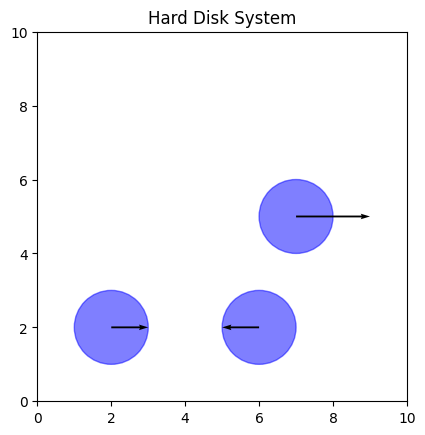

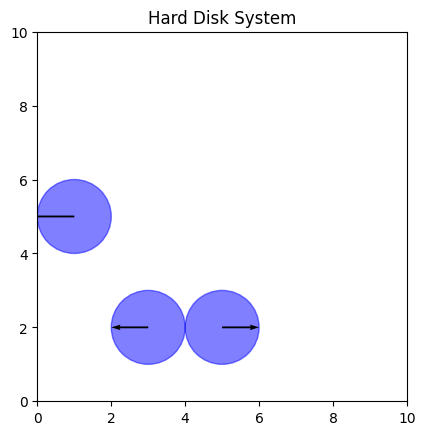

In [ ]:
from base.systems import BoundarySimulation
from copy import deepcopy

# build simulation object
simulation_system_a = deepcopy(system_a)
# simulation_system_b = deepcopy(system_b)

simulation_time = 3
sim_a = BoundarySimulation(simulation_system_a, debug=True)
# sim_b = BoundarySimulation(simulation_system_b)

# fig, axes = plt.subplots(simulation_time+1,2, figsize = (8,30))

sim_a.run(plot_each_step=False, n_steps=simulation_time, debug=True)
# sim_b.run(plot_each_step=True,ax=axes[:,1], n_steps=simulation_time)
# plt.tight_layout()


2025-07-13 15:18:35,916 - INFO - system created with 1000 particles
2025-07-13 15:18:35,917 - INFO - Simulation enviorment with aperiodic boundary created.
2025-07-13 15:18:35,918 - INFO - Running simulation with 5 events
2025-07-13 15:18:35,918 - INFO - time: 0.0
2025-07-13 15:18:37,215 - INFO - time: 0.0008042828216448721
2025-07-13 15:18:37,255 - INFO - time: 0.0008671283951834563
2025-07-13 15:18:37,298 - INFO - time: 0.0014551831658099232
2025-07-13 15:18:37,339 - INFO - time: 0.0016506904170908068


False
False
False
False
False


2025-07-13 15:18:38,593 - INFO - end of simulation


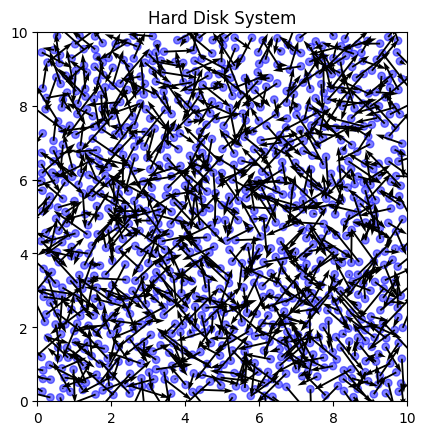

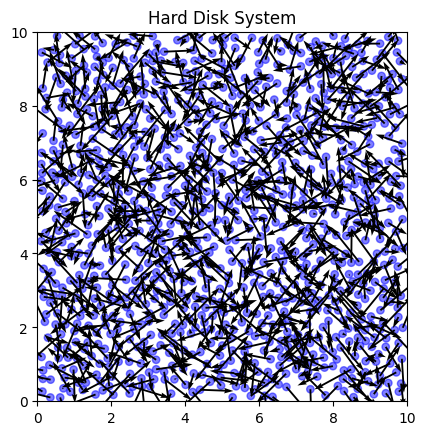

In [6]:
# simulate big system
n_particles = 1000
particle_radius = 0.1
box_size = 10

big_system = HardDiskSystem(
    box_size = box_size, 
    particle_radius=particle_radius, 
    n_particles=n_particles,
    periodic_boundary=False
)

big_simulation = BoundarySimulation(
    system = big_system
)

big_simulation.run()

In [7]:
def _next_pair_colision(system):
    rel_dis = system.get_relative_positions()
    rel_vel = system.get_relative_velocities()

    dx_dv = np.einsum("ijk,ijk->ij",rel_dis,rel_vel)
    dx_dx = np.einsum("ijk,ijk->ij",rel_dis,rel_dis)
    dv_dv = np.einsum("ijk,ijk->ij",rel_vel,rel_vel)

    delta = np.square(dx_dv) - dv_dv * (dx_dx - 4*system.particle_radius**2)
    mask_m = (delta>0) & (dx_dv<0) & (dv_dv>0)

    next_t = np.full_like(delta, np.inf)
    next_t[mask_m] = 0 - (dx_dv[mask_m] + np.sqrt(delta[mask_m]))/dv_dv[mask_m]
    return next_t
    i,j = np.where(next_t == next_t.min())
    colision_time = next_t[i[0],j[0]]
    # print(next_t.shape, dx_dv.shape, dv_dv, delta)
    return [i[0],j[0]],colision_time

test_system = HardDiskSystem(10,1,2)
test_system.positions = np.array([[0.,0.], [4.,0.], [0.,4.], [0.,7.]])
test_system.velocities = np.array([[1.,0.], [-1.,0.], [0.,2.], [0.,-3.]])
_next_pair_colision(system_a)

2025-07-13 15:18:39,182 - INFO - system created with 2 particles


array([[inf,  1., inf],
       [ 1., inf, inf],
       [inf, inf, inf]])

2025-07-13 15:18:39,270 - INFO - Simulation enviorment with aperiodic boundary created.
2025-07-13 15:18:39,271 - INFO - Simulation enviorment with aperiodic boundary created.


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


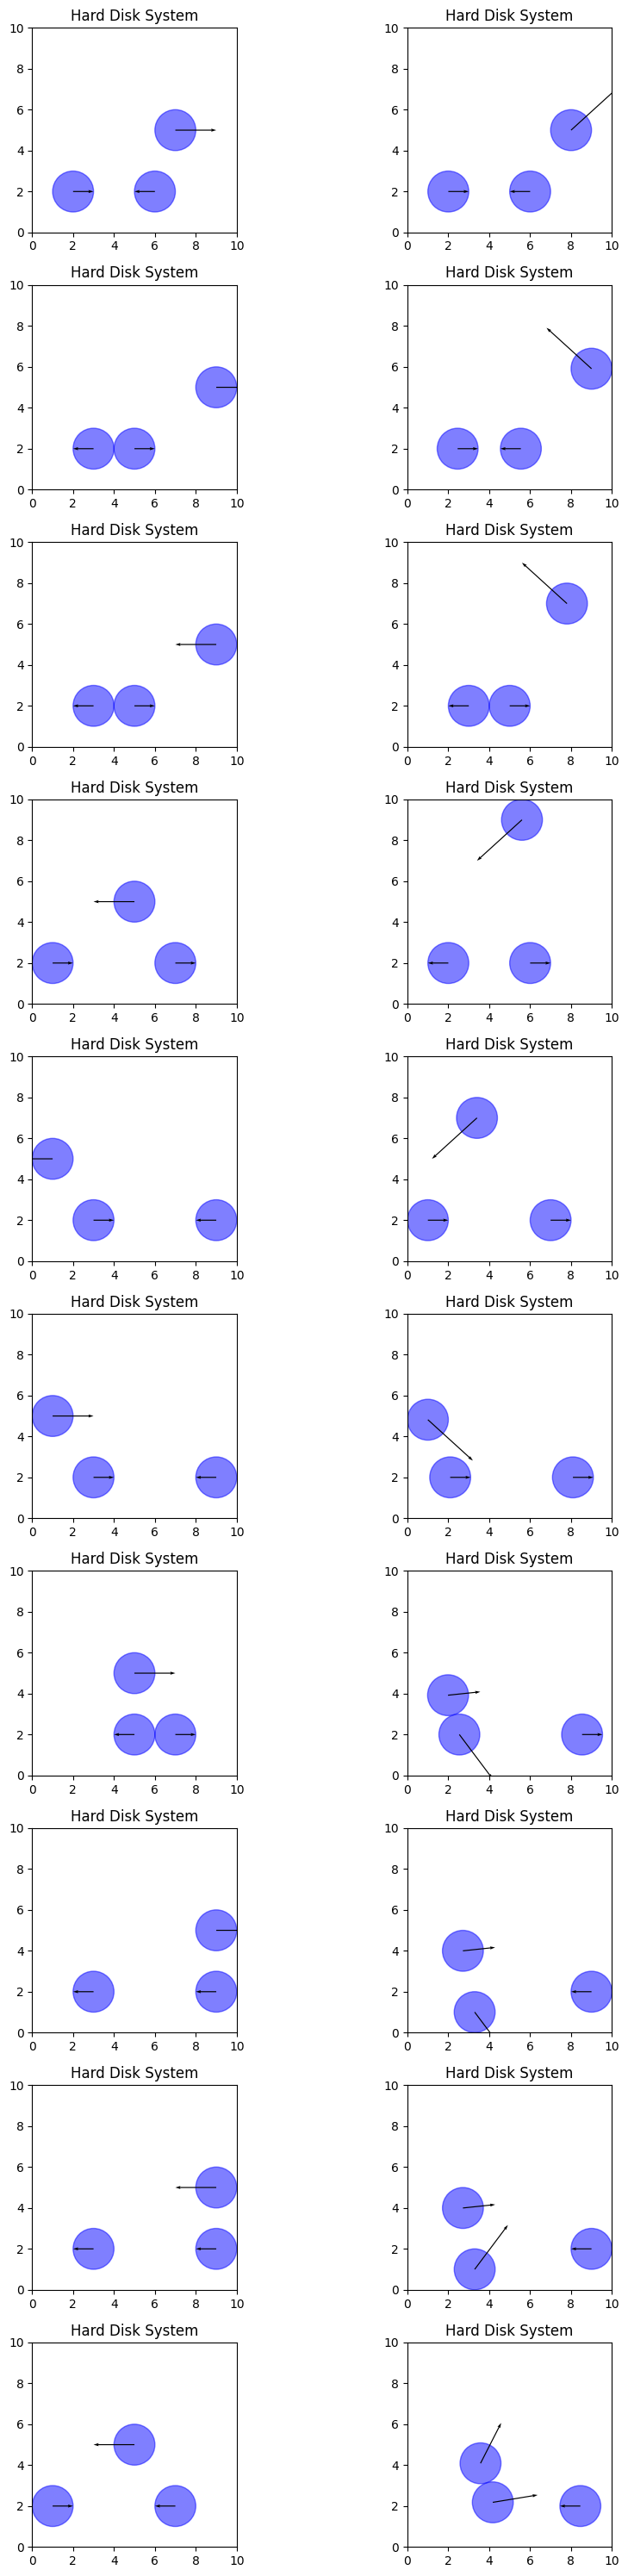

In [8]:
from base.systems import BoundarySimulation
n = 10
fig, axes = plt.subplots(n,2, figsize = (10,30))
sim_a = BoundarySimulation(system=system_a)
sim_b = BoundarySimulation(system=system_b)
for i in range(n):
    sim_a.system.plot_system(ax=axes[i][0])
    sim_a.step()
    sim_b.system.plot_system(ax=axes[i][1])
    sim_b.step()
plt.tight_layout()

In [9]:
t = np